In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv(r".\vijay_cleaned.csv",index_col=False).iloc[:,1:]

df

,marketingStatusSimplifiedCd,hasImage,statusText,beds,baths,area,sgapt,has3DModel,hasAdditionalAttributions,latitude,longitude,city,state,homeType,rentZestimate,price
0,Non Owner Occupied,True,Sold,3.0,2.0,1224.0,Unknown Listed By,False,True,42.293304,-71.133570,Roslindale,MA,SINGLE_FAMILY,3999.0,819500.0
1,RecentChange,True,Sold,1.0,1.0,723.0,Unknown Listed By,False,True,42.344826,-71.074990,Boston,MA,CONDO,3634.0,880000.0
2,RecentChange,True,Sold,6.0,3.0,3396.0,Unknown Listed By,False,True,42.315850,-71.061130,Dorchester,MA,MULTI_FAMILY,6000.0,1250000.0
3,RecentChange,True,Sold,4.0,3.0,2400.0,Unknown Listed By,False,True,42.298183,-71.078870,Dorchester,MA,MULTI_FAMILY,4964.0,805000.0
4,RecentChange,True,Sold,9.0,3.0,4107.0,RecentChange,False,True,42.300050,-71.083694,Dorchester,MA,MULTI_FAMILY,8970.0,650000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6201,RecentChange,True,Sold,5.0,4.0,2366.0,Unknown Listed By,False,True,38.963560,-77.016990,Washington,DC,SINGLE_FAMILY,4999.0,1125000.0
6202,RecentChange,True,Sold,3.0,3.0,1802.0,Unknown Listed By,False,True,38.952750,-77.009360,Washington,DC,TOWNHOUSE,3449.0,465000.0
6203,RecentChange,True,Sold,4.0,4.0,2875.0,RecentChange,False,True,38.928920,-76.992680,Washington,DC,SINGLE_FAMILY,4749.0,1020000.0
6204,Non Owner Occupied,False,Sold,4.0,2.5,1260.0,Unknown Listed By,False,False,38.894318,-76.981830,Washington,DC,SINGLE_FAMILY,3994.0,550000.0


In [12]:
df.dtypes.value_counts()

float64    7
object     6
bool       3
Name: count, dtype: int64

In [22]:
catCols=df.dtypes[df.dtypes.isin(["object","bool"])].index
numCols=df.dtypes[df.dtypes=="float64"].index

print("Categorical columns:")
print(list(catCols))
print("Numerical columns:")
print(list(numCols))

Categorical columns:
['marketingStatusSimplifiedCd', 'hasImage', 'statusText', 'sgapt', 'has3DModel', 'hasAdditionalAttributions', 'city', 'state', 'homeType']
Numerical columns:
['beds', 'baths', 'area', 'latitude', 'longitude', 'rentZestimate', 'price']


# Univariate Analysis

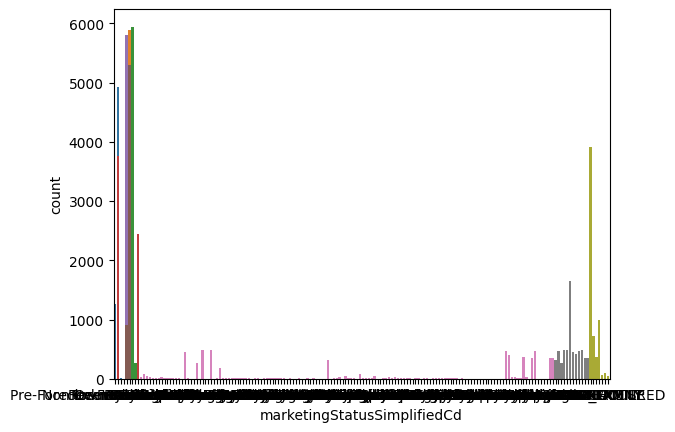

In [24]:
for col in catCols:
    sns.countplot(data=df.value_counts(),x=col)